In [ ]:
#Step 3 - Climate Analysis and Exploration
# climate_analysis.ipynb

#dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func
import datetime as dt

In [3]:
# Read weather data
df_measurements = pd.read_csv("clean_hawaii_measurements.csv")
df_stations = pd.read_csv("clean_hawaii_stations.csv")
df_stations.head()

,id,station,name,latitude,longitude,elevation
0,0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [4]:
df_measurements.head()

,id,station,date,prcp,tobs
0,0,USC00519397,2010-01-01,0.08,65
1,1,USC00519397,2010-01-02,0.00,63
2,2,USC00519397,2010-01-03,0.00,74
3,3,USC00519397,2010-01-04,0.00,76
4,5,USC00519397,2010-01-07,0.06,70


In [5]:
measurements_data = df_measurements.to_dict(orient='records')
stations_data = df_stations.to_dict(orient='records')
#print(measurements_data)

In [6]:
#Use SQLAlchemy create_engine to connect to your sqlite database.
#Use the engine and connection string to create a database called hawaii.sqlite.
engine = create_engine("sqlite:///hawaii.sqlite")
session = Session(bind=engine)
conn = engine.connect()

In [7]:
#Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those
#classes called Station and Measurement.
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [8]:
Measurement = Base.classes.measurements
Station = Base.classes.stations
session.query(Station).delete()
session.commit()

In [9]:
for station_row in stations_data:
    session.add(Station(**station_row))
session.commit()

In [10]:
# Query all tobs values
session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999995, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [11]:
session.query(Measurement).delete()
session.commit()

In [12]:
for measurement_row in measurements_data:
    #print(measurement_row)
    dt_year  = int(measurement_row['date'][:4])
    dt_month =  int(measurement_row['date'][5:7])
    dt_day = int(measurement_row['date'][8:10])
    date = dt.date(dt_year, dt_month, dt_day)
    session.add(Measurement(**{
        'id': measurement_row['id'],
        'station': measurement_row['station'],
        'prcp': measurement_row['prcp'],
        'tobs': measurement_row['tobs'],
        'date': date}))
session.commit()
#session.rollback()

In [13]:
session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).limit(5).all()
#engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(0, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (1, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (2, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (3, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-07', 0.06, 70.0)]

In [14]:
#Choose a start date and end date for your trip. Make sure that your vacation range is approximately
#3-15 days total.
trip_start = dt.date(2017, 8, 15)
trip_end = dt.date(2017, 8, 30)

In [30]:
### Precipitation Analysis

### # Design a query to retrieve the last 12 months of precipitation data and plot the results
end_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
dt_year  = int(end_date_str[:4])
dt_month =  int(end_date_str[5:7])
dt_day = int(end_date_str[8:10])
end_date = dt.date(dt_year, dt_month, dt_day)
start_date = end_date - dt.timedelta(days=365)

print("Start Date: ", start_date)
print("End Date: ", end_date)

#Select only the date and prcp values
measurement_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).all()



Start Date:  2016-08-23
End Date:  2017-08-23


In [31]:
#Load the query results into a Pandas DataFrame and set the index to the date column.
precip_stat_df = pd.DataFrame(measurement_year)
#precip_stat_df.set_index('date', inplace=True)
precip_stat_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


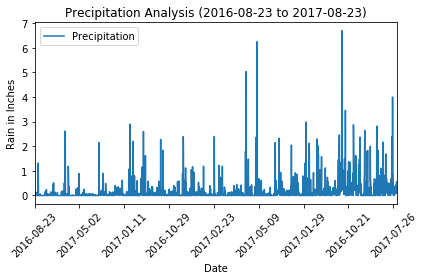

In [17]:
#Plot the results using the DataFrame plot method.
precip_stat_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (2016-08-23 to 2017-08-23)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#Use Pandas to print the summary statistics for the precipitation data.
precip_stat_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
#Station Analysis
session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()

[(0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (1, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (2,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (3, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (4, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (5,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (6,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999995,
  32.9),
 (7,
  'USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 (8, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [20]:
#Design a query to calculate the total number of stations.
total_stats = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations.".format(total_stats))

There are 9 stations.


In [21]:
#Design a query to find the most active stations.
most_active_stats= session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Set above query results to dataframe
df_most_active_stats = pd.DataFrame(data=most_active_stats, columns=['Station', 'Count'])
df_most_active_stats.head()

,Station,Count
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484


In [22]:
#List the stations and observation counts in descending order
desc_observations=session.query(Measurement.station, func.count(Measurement.id)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.id).desc()).all()  
desc_observations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [23]:
#Which station has the highest number of observations?
highest_observation=session.query(Measurement.station, func.count(Measurement.id)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.id).desc()).first() 
print(f"The station with the highest number of observations is {highest_observation}")

The station with the highest number of observations is ('USC00519281', 2772)


In [24]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
tobs_measurement_year = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).all()
    #Load the query results into a Pandas DataFrame and set the index to the date column.
tobs_stat_df = pd.DataFrame(tobs_measurement_year)
#tobs_stat_df.set_index('date', inplace=True)
tobs_stat_df.head()

,date,station,tobs
0,2016-08-23,USC00519397,81.0
1,2016-08-24,USC00519397,79.0
2,2016-08-25,USC00519397,80.0
3,2016-08-26,USC00519397,79.0
4,2016-08-27,USC00519397,77.0


In [25]:
#Filter by the station with the highest number of observations.
tobs_for_12months = session.query(Measurement.tobs).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.station == highest_observation[0]).\
    order_by(Measurement.tobs).all()
    
tobs_for_12months

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

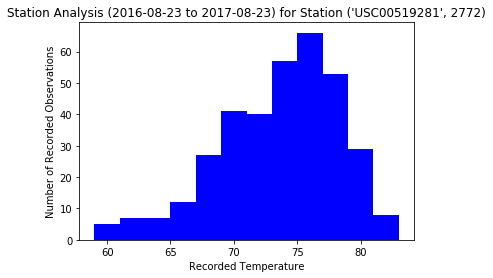

In [26]:
#Plot the results as a histogram with bins=12.
hist, bins = np.histogram(tobs_for_12months, bins=12)

# Set bar width to the number of values between each bin
width = bins[1] - bins[0]
center = (bins[:-1] + bins[1:]) / 2
# Plot the bar graph from the histogram data
plt.bar(center, hist, width=width, color='blue')
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis (2016-08-23 to 2017-08-23) for Station " + str(highest_observation))
plt.show()

In [27]:
# Temperature Analysis
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d
#and return the minimum, average, and maximum temperatures for that range of dates.
def calc_temps(start_date, end_date):
     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
temp_range = (calc_temps('2017-08-15', '2017-08-30'))
print(temp_range)

[(70.0, 78.29032258064517, 83.0)]


In [28]:
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip
#using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")
my_trip_start = dt.date(2018, 8, 15)
my_trip_end = dt.date(2018, 8, 30)
prev_year = dt.timedelta(days=365)
temp_range = (calc_temps(my_trip_start-prev_year, my_trip_end-prev_year))
print(temp_range)

[(70.0, 78.29032258064517, 83.0)]


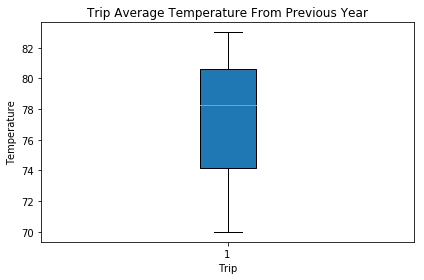

In [29]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.
#Use the average temperature as the bar height.
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
fig, ax = plt.subplots()
x = range(len(temp_range))
ax.boxplot(temp_range, patch_artist=True)
ax.set_title('Trip Average Temperature From Previous Year')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()